In [42]:
import cv2
import numpy as np
import imageio as iio
from scipy import ndimage
from matplotlib import pyplot as plt

In [54]:
img = iio.imread('ct.jpg')
img = img[:,:,0]
(m,n) = img.shape
print(img.shape)

(256, 256)


In [55]:
imgF = np.fft.fftshift(np.fft.fft2(img))

zoomedF = np.zeros((3*m,3*n)).astype(complex)
zoomedF[m:2*m,n:2*n] = 9*imgF #for normalization of upsampling

zoomed = np.fft.ifft2(np.fft.ifftshift(zoomedF))

zoom = 3.0


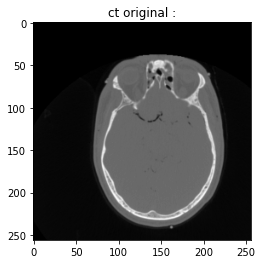

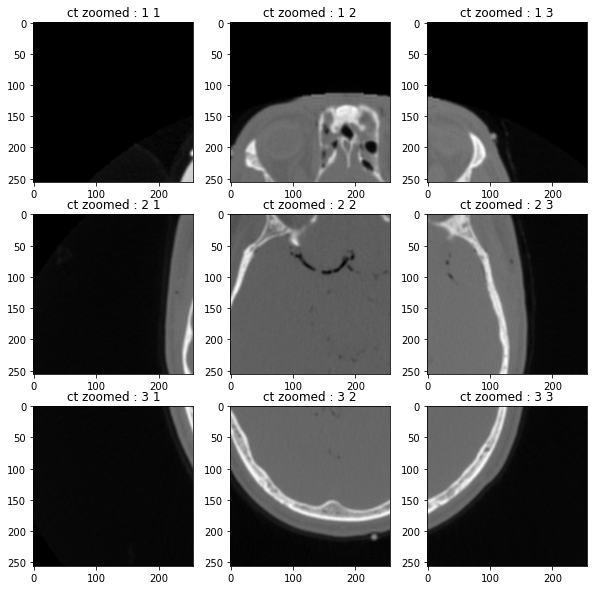

In [57]:
plt.figure(figsize = (4, 4))
plt.imshow(img,cmap='gray')
plt.title('ct original :')

plt.figure(figsize = (10, 10))
for i in range(3):
    for j in range(3):
        plt.subplot(3,3,i*3+j+1)
        plt.imshow(np.abs(zoomed[i*m:i*m+m, j*n:j*n+n]).astype(np.uint8),cmap='gray');
        plt.title('ct zoomed : '+str(i+1)+' '+str(j+1));
        
print('zoom = '+str(zoomed.shape[0]/img.shape[0]))